## 7. Features

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=aNVkTrCS6lE&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience07.png)](https://www.youtube.com/watch?v=aNVkTrCS6lE&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

**Classification** predicts *discrete labels (outcomes)* such as `yes`/`no`, `True`/`False`, or any number of discrete levels such as a letter from text recognition. An example of classification is to suggest a movie you will want to watch next (label) based on your prior viewing history (feature). **Regression** is different than classification with continuous outcomes such as any floating point number in a range. An example of regression is to build a correlation of the temperature of a pan of water (label) based on the time it has been heating (feature). The temperature values are continuous while the next movie is one of many discrete options.

![list](https://apmonitor.com/che263/uploads/Begin_Python/list.png)

Features are input values to regression or classification models. The **features are inputs** and **labels are the measured outcomes**. Below is a table of terms with terminology from machine learning, optimization, methods in `GEKKO`, and a description.

| **Machine Learning** | **Optimization** | **Gekko Estimation** | **Description** |
| ----------- | ----------- | ----------- | ----------- |
| Loss | Objective Function | `m.Minimize()` | The mathematical quantity that represents the difference between the predicted and measured outcomes |
| Weights | Adjustable Parameters | Fixed Values (`m.FV()`) with `STATUS=1` | Adjustable values to minimize the loss function |
| Label | Measured Outcome | Controlled Variable (`m.CV()`) with `FSTATUS=1` | Measurements of the predicted system output |
| Feature | Measured Input | Parameter (`m.Param()`) | Input measurements that predict the outcome label |
| Train | Optimize | Solve (`m.solve()`) | Adjust the unknown parameters (weights) to minimize the objective (loss) function |
| Test | Evaluate | Solve with `STATUS=0` for `m.FV()` | Predict the labels with the tuned model to evaluate the performance of the classifier or regressor | 
| Regressor or Classifier | Model | `m = GEKKO()` | Mathematical equations and parameters that use feature inputs to predict an outcome label |

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

Selection and creation of features is an important step in machine learning. Too many features may cause the classifier or regressor to increase the chances of predicting poorly. With many features, one of the inputs may be a bad value and cause a bad prediction. More features also take longer for data curation, training, and prediction. This lesson shows how to derive and select features for regression and classification.

![analyze](https://apmonitor.com/che263/uploads/Begin_Python/analyze.png)

### Identify Features and Label

The first step in building a regressor or classifier is to determine what measurements (input features and output label) are available. You can select the data columns as features or generate [derived features](https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219) with a package such as [`Featuretools`](https://towardsdatascience.com/why-automated-feature-engineering-will-change-the-way-you-do-machine-learning-5c15bf188b96).

You may want to use stock market data to give you an indicator on when to buy (`1`) or sell (`-1`). This indicator is a label. Import the daily stock data for Google for 23 days.  

In [1]:
import pandas as pd
import numpy as np
url = 'http://apmonitor.com/che263/uploads/Main/goog.csv'
data = pd.read_csv(url)
data = data.drop(columns=['Adj Close'])
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-09-11,934.250000,938.380005,926.919983,929.080017,1267000
1,2017-09-12,932.590027,933.479980,923.861023,932.070007,1134400
2,2017-09-13,930.659973,937.250000,929.859985,935.090027,1102600
3,2017-09-14,931.250000,932.770020,924.000000,925.109985,1397600
4,2017-09-15,924.659973,926.489990,916.359985,920.289978,2505400


The features may be any of the categories that may useful in predicting a future stock price change. The `Open`, difference in `High` and `Low` (`Volitility`), difference in `Close` and `Open` (`Change`), and the `Volume` of trades are features. The `.diff()` calculates the difference and `.fillna(0)` replaces any `NaN` with zero. Add any other additional features that you would like to consider.

In [3]:
features = ['Open','Volatility','Change','Volume']
data['Volatility'] = (data['High']-data['Low']).diff().fillna(0)
data['Change'] = (data['Close']-data['Open']).diff().fillna(0)
# any other features?
data.head()

,Date,Open,High,Low,Close,Volume,Volatility,Change
0,2017-09-11,934.250000,938.380005,926.919983,929.080017,1267000,0.000000,0.000000
1,2017-09-12,932.590027,933.479980,923.861023,932.070007,1134400,-1.841065,4.649963
2,2017-09-13,930.659973,937.250000,929.859985,935.090027,1102600,-2.228942,4.950074
3,2017-09-14,931.250000,932.770020,924.000000,925.109985,1397600,1.380005,-10.570069
4,2017-09-15,924.659973,926.489990,916.359985,920.289978,2505400,1.359985,1.770020


A label (outcome) for classification is the sign (`+` or `-`) of the close price from one day to the next. The `np.roll( ,-1)` shifts all the values up by one to indicate the change for the next day on that same row. The `np.sign()` returns the sign of the difference as an indicator of buy or sell and `.dropna()` drops the last row that is `NaN`.

In [4]:
data['Close_diff'] = np.roll(data['Close'].diff(),-1)
data=data.dropna()
label = ['Buy/Sell']
data['Buy/Sell'] = np.sign(data['Close_diff'])
data.head()

,Date,Open,High,Low,Close,Volume,Volatility,Change,Close_diff,Buy/Sell
0,2017-09-11,934.250000,938.380005,926.919983,929.080017,1267000,0.000000,0.000000,2.989990,1.0
1,2017-09-12,932.590027,933.479980,923.861023,932.070007,1134400,-1.841065,4.649963,3.020020,1.0
2,2017-09-13,930.659973,937.250000,929.859985,935.090027,1102600,-2.228942,4.950074,-9.980042,-1.0
3,2017-09-14,931.250000,932.770020,924.000000,925.109985,1397600,1.380005,-10.570069,-4.820007,-1.0
4,2017-09-15,924.659973,926.489990,916.359985,920.289978,2505400,1.359985,1.770020,-5.289978,-1.0


![power](https://apmonitor.com/che263/uploads/Begin_Python/power.png)

### Selecting the Best Features

We have now generated a number of features but we want to evaluate which ones are the best predictors of the labeled outcome. There are a variety of methods to evaluate how many features are needed (correlation) and which are the best (selection). The first thing to do is to separate into input `X` and output `y` with data scaling (`0` to `1`).

In [5]:
data[features+label].head()

,Open,Volatility,Change,Volume,Buy/Sell
0,934.250000,0.000000,0.000000,1267000,1.0
1,932.590027,-1.841065,4.649963,1134400,1.0
2,930.659973,-2.228942,4.950074,1102600,-1.0
3,931.250000,1.380005,-10.570069,1397600,-1.0
4,924.659973,1.359985,1.770020,2505400,-1.0


In [6]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
ds = s.fit_transform(data[features+label])
ds = pd.DataFrame(ds,columns=data[features+label].columns)
X = ds[features]
y = ds[label]
ds.head()

,Open,Volatility,Change,Volume,Buy/Sell
0,0.268936,0.490612,0.434248,0.234185,1.0
1,0.242410,0.415466,0.567180,0.152186,1.0
2,0.211569,0.399635,0.575759,0.132521,0.0
3,0.220997,0.546938,0.132073,0.314947,0.0
4,0.115692,0.546121,0.484849,1.000000,0.0


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

#### Selection

There are statistical tests to select features that strong relationships with the output label. A tool is the scikit-learn `SelectKBest` method with associated statistical tests. This method uses a $\chi^2$ statistical test for non-negative features to select 10 of the best features for predicting the output.

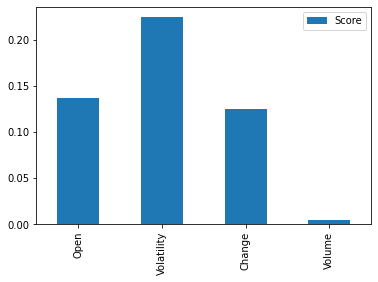

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib inline
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['Specs','Score']
scores.index = features
scores.plot(kind='bar')
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

Based on this information, drop any low scoring features with `.remove()`.

In [8]:
# drop any low scoring features with features.remove('')
features.remove('Volume')
print(features)

['Open', 'Volatility', 'Change']


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

#### Feature Importance

There is a method that comes with a Tree Based Classifier to give a score for each feature of the data. Higher score correlates to more importance and relevance for predicting the output variable. The results change each analysis due to the stochastic nature of the calculation but `Volitility` is again a factor that typically ranks highest.

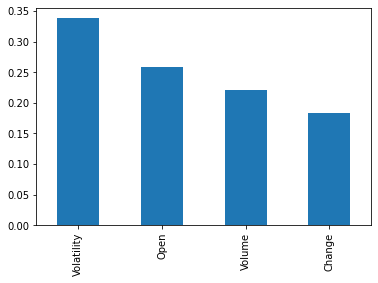

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,np.ravel(y))

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='bar')
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

#### Correlation Matrix with Heatmap

Correlation shows how strongly features are related to each other. A large value, either positive or negative, incidates that the values are correlated. Correlated values mean that one of them may be eliminated because they are providing similar input information. A heatmap is a symmetric visual grid of the correlation matrix. The diagonal is always 1 because each value perfectly correlates to itself. From the heatmap, determine which features are most correlated and may be able to be removed.

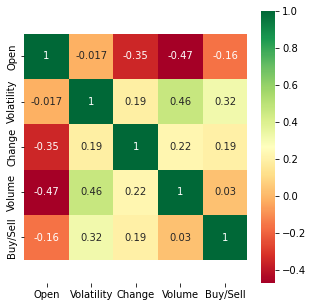

In [13]:
import seaborn as sns
corrmat = ds.corr()
top_features = corrmat.index
plt.figure(figsize=(5,5))
sns.heatmap(ds[top_features].corr(),annot=True,cmap="RdYlGn")
b, t = plt.ylim(); plt.ylim(b+0.5, t-0.5) # addresses issue in matplotlib 3.1.1
plt.show()

Volume and Open are kind of coorelated (-.5). Volume and Volatility are pretty correlated too. So to solve this, I think we eliminate Volume. 

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### TCLab Activity

Consider how you could determine if the TCLab heater is on or off without knowing the `Q1` value. You would likely measure the `T1` temperature and observe if the temperature is rising or falling. However, just observing the temperature and slope is not enough because the temperature continues to rise for 10-20 seconds after the heater is turned off. As a result, you need to calculate the 2nd derivative of the temperature to classify the heater state as on or off. A positive 2nd derivative is another clue that the heater is on. 

![temperature](https://apmonitor.com/che263/uploads/Begin_Python/temperature.png)

In the case of whether the heater is on or off (*measured outcome*), the temperature and derivatives are the *features*. Run the code below to generate temperature data with the heater `on` at 100% or `off` at 0% in 20-30 second intervals for 3 minutes.

In [16]:
# import tclab, time
import numpy as np
import pandas as pd
try:
    with tclab.TCLab() as lab:
        n = 180; t = np.linspace(0,n-1,n)        
        Q1 = np.zeros(n); T1 = np.zeros(n)
        Q2 = np.zeros(n); T2 = np.zeros(n)        
        Q1[20:41] = 100.0; Q1[60:91] = 100.0
        Q1[150:181] = 100.0; Q1[190:206] = 100.0
        Q1[220:251] = 100.0; Q1[260:291] = 100.0
        print('Time Q1 Q2 T1   T2')
        for i in range(180):
            T1[i] = lab.T1; T2[i] = lab.T2
            lab.Q1(Q1[i])
            if i%10==0:
                print(int(t[i]),Q1[i],Q2[i],T1[i],T2[i])
            time.sleep(1)
    data = np.column_stack((t,Q1,Q2,T1,T2))
    data7 = pd.DataFrame(data,columns=['Time','Q1','Q2','T1','T2'])
    data7.to_csv('07-tclab.csv',index=False)
except:
    print('Connect TCLab to generate new data')
    print('Importing data from online source')
    url = 'http://apmonitor.com/do/uploads/Main/tclab_data5.txt'
    data7=pd.read_csv(url)

data7.head()

Connect TCLab to generate new data
Importing data from online source


,Time,Q1,Q2,T1,T2
0,0.0,0.0,0.0,16.00,16.06
1,1.0,0.0,0.0,16.00,16.06
2,2.0,0.0,0.0,15.94,16.06
3,3.0,0.0,0.0,16.03,16.06
4,4.0,0.0,0.0,16.03,16.06


### Create Features

Create three features from the data including the temperature and the derivatives.

- Temperature: $T_1$
- Temperature derivative: $\frac{dT_1}{dt}$
- Temperature 2nd derivative: $\frac{d^2T_1}{dt^2}$

Add the derivatives as columns in `data7`.

In [21]:
features = ['Dt', 'Ddt']
dT1_dt = data7['T1'].diff()/data7['Time'].diff()
data7['dT1/dt'] = dT1_dt
ddT1_dt = data7['dT1/dt'].diff()/data7['Time'].diff()
data7['ddT1/dt'] = ddT1_dt
data7.head()

,Time,Q1,Q2,T1,T2,dT1/dt,ddT1/dt
0,0.0,0.0,0.0,16.00,16.06,NaN,NaN
1,1.0,0.0,0.0,16.00,16.06,0.00,NaN
2,2.0,0.0,0.0,15.94,16.06,-0.06,-0.06
3,3.0,0.0,0.0,16.03,16.06,0.09,0.15
4,4.0,0.0,0.0,16.03,16.06,0.00,-0.09


### Scale the Data

Scale `data7` to be between `0` and `1` with `d7 = s.fit_transform(data7)`. Don't forget to translate the scaled values back to a `pandas` DataFrame.

In [29]:
d7 = s.fit_transform(data7)
data7 = pd.DataFrame(d7, columns=data7.columns).fillna(0)
data7.head()

,Time,Q1,Q2,T1,T2,dT1/dt,ddT1/dt
0,0.000000,0.0,0.0,0.002455,0.002899,0.000000,0.000000
1,0.001667,0.0,0.0,0.002455,0.002899,0.395161,0.000000
2,0.003333,0.0,0.0,0.000982,0.002899,0.346774,0.326425
3,0.005000,0.0,0.0,0.003191,0.002899,0.467742,0.435233
4,0.006667,0.0,0.0,0.003191,0.002899,0.395161,0.310881


### Rank Features

Use `SelectKBest` to determine the best features. 

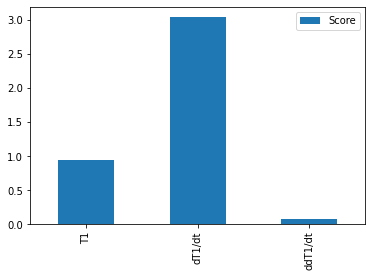

           Specs     Score
T1            T1  0.942707
dT1/dt    dT1/dt  3.040066
ddT1/dt  ddT1/dt  0.073085


In [55]:
features = ['T1', 'dT1/dt','ddT1/dt']
label = 'Q1'
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(data7[features],data7[label])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data7[features].columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['Specs','Score']
scores.index = features
scores.plot(kind='bar')
plt.show()

print(scores)

### Feature Correlation

Generate a Heat Map to determine the correlation of the features. 

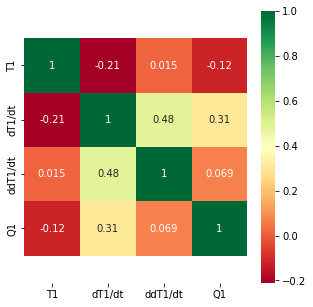

In [54]:
everything = ['T1', 'dT1/dt','ddT1/dt', 'Q1']
top_features=['T1','dT1/dt']
corrmat = data7[everything].corr()
top_features = corrmat.index
plt.figure(figsize=(5,5))
sns.heatmap(data7[top_features].corr(),annot=True,cmap="RdYlGn")
b, t = plt.ylim(); plt.ylim(b+0.5, t-0.5) # addresses issue in matplotlib 3.1.1
plt.show()